In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [2]:
# Dictionary of numerical IDs for each of the 50 states
stateIds={'AK': 1, 'AL': 2, 'AR': 3, 'AZ': 4, 'CA': 5, 'CO': 6, 'CT': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'ID': 12, 'IL': 13, 'IN': 14, 'IA': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'ME': 19, 'MD': 20, 'MA': 21, 'MI': 22, 'MN': 23, 'MS': 24, 'MO': 25, 'MT': 26, 'NE': 27, 'NV': 28, 'NH': 29, 'NJ': 30, 'NM': 31, 'NY': 32, 'NC': 33, 'ND': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VT': 45, 'VA': 46, 'WA': 47, 'WV': 48, 'WI': 49, 'WY': 50}

In [3]:
class CovidTimeSeries(object):
    """ Stores the JHU time series data for a county for covid """
    def __init__(self):
        self.regionName=None
        self.positive=None  #Infected used by the paper
        self.Lat=None 
        self.Long=None
        self.healed=None   #Recovered
        self.totalCases=None
        self.deaths=None 

class CovidDatabase(object):
    """ Stores the covid-19 data"""
    def __init__(self):
        self.CovidData={}
        self.DateRange=[]
      
    def loadTimeSeries(self, filenameI, startdate, enddate):
        """ load the infections data from filenameI and death data from filenameD
            from startdate to enddate
        """
        csvfile=open(filenameI, newline='')
        rd = csv.reader(csvfile, delimiter=',')
        data=[]
        for lv in rd:
                # Place data at front of list since dates in data are reversed
                data.insert(0, lv)

        header=data[0]
        
        infectionData=(data[1:])
        temp = np.array(infectionData)
        dates = temp[:,0]
        dates = dates.tolist()

        CountyD={}
        N=len(infectionData);
        
        hasRecovered = []
        
        for i in range(N):
            if infectionData[i][1] not in stateIds:
                # If the state code isn't a valid code, skip it
                continue
            if not startdate <= infectionData[i][0] <= enddate:
                continue
            if stateIds[infectionData[i][1]] not in CountyD: #if key not already initialized
                c1=CovidTimeSeries()
                c1.regionName = infectionData[i][1]
                # Place all states at null island so we can process the rest of the simulation
                c1.Lat = 0.0 #float(infectionData[i][4])
                c1.Long = 0.0 #float(infectionData[i][5])
                # TODO: make and parse list of states with numeric ids
                x=stateIds[infectionData[i][1]]
                # Check for empty strings to avoid conversion errors
                c1.deaths = [float(infectionData[i][3]) if infectionData[i][3] else 0.0]
                c1.positive = [float(infectionData[i][19]) if infectionData[i][19] else 0.0]
                c1.totalCases = [float(infectionData[i][19]) if infectionData[i][19] else 0.0]
                c1.healed = [float(infectionData[i][28]) if infectionData[i][28] else 0.0]
                if infectionData[i][28]:
                    hasRecovered.append(infectionData[i][1])
                CountyD[x]=c1
            else: #if key already initialized
                x=stateIds[infectionData[i][1]]
                CountyD[x].deaths.append(float(infectionData[i][3]) if infectionData[i][3] else 0.0)
                CountyD[x].positive.append(float(infectionData[i][19]) if infectionData[i][19] else 0.0)
                CountyD[x].totalCases.append(float(infectionData[i][19]) if infectionData[i][19] else 0.0)
                CountyD[x].healed.append(float(infectionData[i][28]) if infectionData[i][28] else 0.0)
                if infectionData[i][28] and infectionData[i][1] not in hasRecovered:
                    hasRecovered.append(infectionData[i][1])
          
        print(hasRecovered)
        
        for key in CountyD: #Turn the lists into arrays
            CountyD[key].deaths = np.array(CountyD[key].deaths)
            CountyD[key].positive = np.array(CountyD[key].positive)
            CountyD[key].healed = np.array(CountyD[key].healed)
            CountyD[key].totalCases = np.array(CountyD[key].totalCases)

             
        self.DateRange=dates
        self.CovidData=CountyD
        

In [4]:
# Modify the path syntax based on the current platform
if platform.system() == "Windows":
    pathc="..\\Data\\"
elif platform.system() == "Linux":
    pathc="../Data/"

fullDataName="all-states-history.csv"

startdate='2020-03-07'
enddate='2020-06-11'

database=CovidDatabase();
database.loadTimeSeries(pathc+fullDataName, startdate, enddate)

['WY', 'MN', 'ME', 'AR', 'SD', 'IA', 'DE', 'ND', 'MD', 'NM', 'TX', 'VT', 'TN', 'NH', 'HI', 'OK', 'MI', 'AK', 'MT', 'WV', 'KY', 'UT', 'ID', 'SC', 'LA', 'MS', 'WI', 'CT', 'OR', 'PA', 'AL', 'MA', 'NE']


# Graphing Longitute and Latitude of the Counties

50 WY
48 WV
49 WI
47 WA
45 VT
46 VA
44 UT
43 TX
42 TN
41 SD
40 SC
39 RI
38 PA
37 OR
36 OK
35 OH
32 NY
28 NV
31 NM
30 NJ
29 NH
27 NE
34 ND
33 NC
26 MT
24 MS
25 MO
23 MN
22 MI
19 ME
20 MD
21 MA
18 LA
17 KY
16 KS
14 IN
13 IL
12 ID
15 IA
11 HI
10 GA
9 FL
8 DE
7 CT
6 CO
5 CA
4 AZ
3 AR
2 AL
1 AK


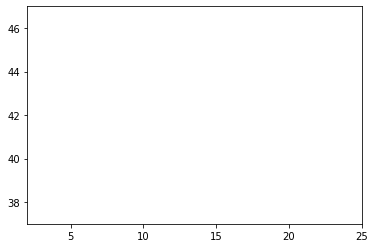

In [5]:
fig, ax=plt.subplots(figsize=(6,4))
CountyD=database.CovidData
for key in CountyD:
    lg=CountyD[key].Long
    lt=CountyD[key].Lat
    ax.plot(lg, lt, 'r.');
    ax.axis([2,25, 37,47])
    print(key, CountyD[key].regionName)

# Raw Infected and Recovered Data

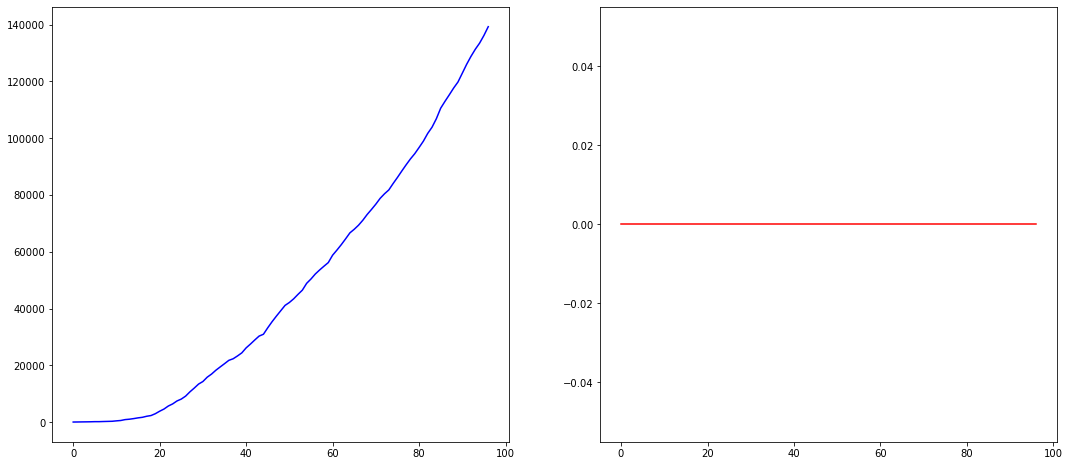

In [6]:
k1 = 5 #California
d1 = database.CovidData[k1].positive
i1=database.CovidData[k1].healed

fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
ax2[0].plot(d1, color='blue', label='infections')
ax2[1].plot(i1, color='red', label='recovered')

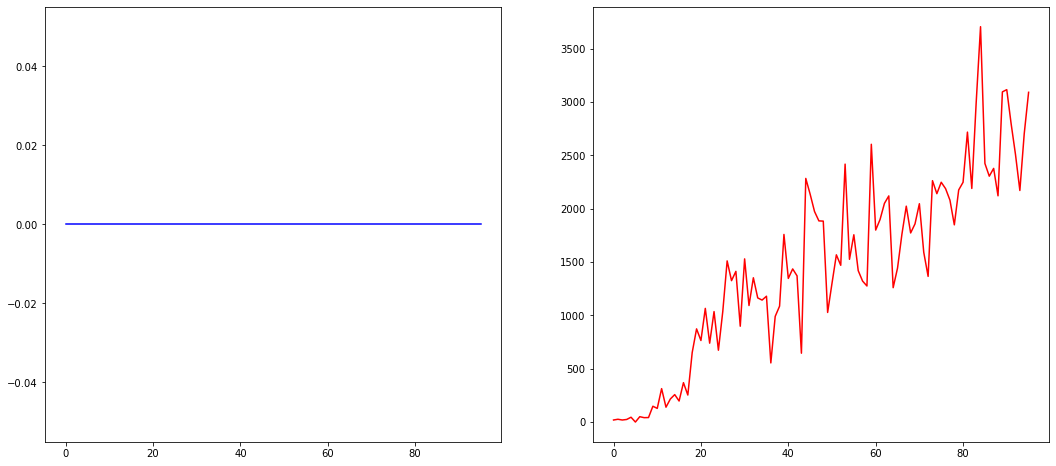

In [7]:
ri1=np.diff(i1)
rd1=np.diff(d1)
fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
ax2[0].plot(ri1, color='blue', label='infections')
ax2[1].plot(rd1, color='red', label='deaths')

# Smoothing Kernel

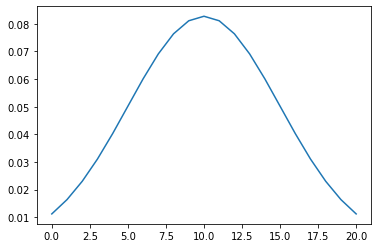

In [8]:
sigma = 5
conSize = 10
x2 = np.arange(-conSize, 1 + conSize)
kernel2 = np.exp(-(x2) ** 2 / (2 * sigma ** 2))
kernel2=kernel2/sum(kernel2)
plt.plot(kernel2)

# Raw Data

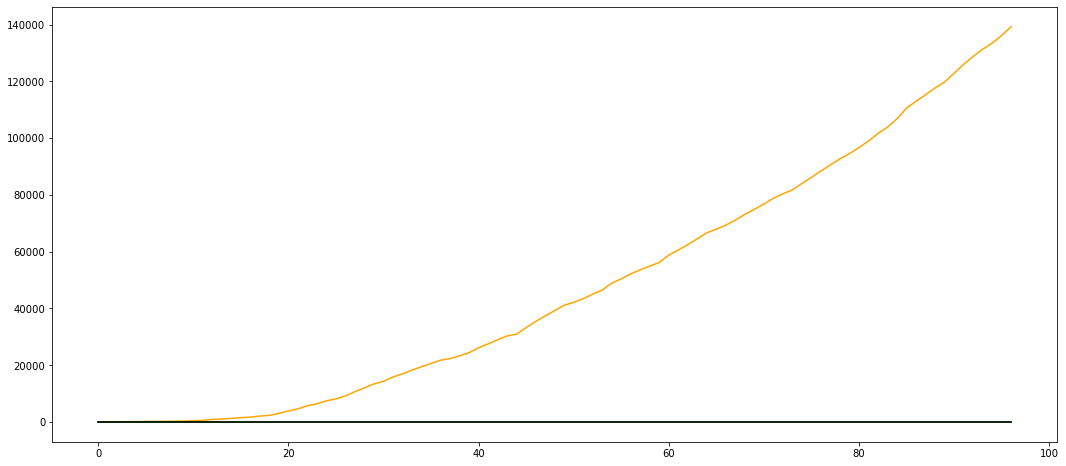

In [9]:
popITA = 4000000 #Very rought estimate just for exerimentation, assume population of california is 40 million
infectRaw = database.CovidData[k1].positive
recovRaw = database.CovidData[k1].healed
deadRaw = database.CovidData[k1].deaths
susceptRaw = popITA - infectRaw - recovRaw - deadRaw #S + I + R + D = totalPop

fig, ax = plt.subplots(figsize=(18,8))
#ax.plot(suscept, color='blue', label='suscpetible') #graphing susceptible makes the scaling to hard to visualize
ax.plot(infectRaw, color='orange', label='infected')
ax.plot(recovRaw, color='green', label='recovered')
ax.plot(deadRaw, color='black', label='dead')

# Smoothed Data

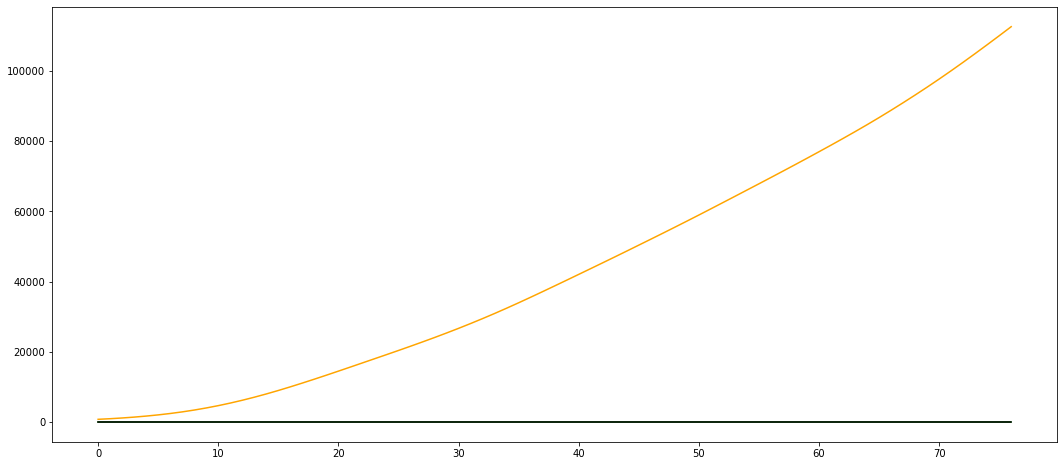

In [10]:
#option for use of raw numbers for data, no smoothing
#infect = infectRaw
#recov = recovRaw
#dead = deadRaw
#suscept = susceptRaw

#convolve the data to smooth out, valid mode keeps bound points realistic
infect = np.convolve(infectRaw, kernel2, 'valid')
recov = np.convolve(recovRaw, kernel2, 'valid')
dead = np.convolve(deadRaw, kernel2, 'valid')
suscept = popITA - infect - recov - dead #S + I + R + D = totalPop

fig, ax = plt.subplots(figsize=(18,8))
#ax.plot(suscept, color='blue', label='suscpetible') #graphing susceptible makes the scaling to hard to visualize
ax.plot(infect, color='orange', label='infected')
ax.plot(recov, color='green', label='recovered')
ax.plot(dead, color='black', label='dead')

### Modeling $\gamma$ (recovery rate), $\beta$ (transmission rate), and $\upsilon$ (death rate).

$S(t+1) = -\beta S(t)I(t) + S(t)$

$I(t+1) = \beta S(t)I(t) - \gamma I(t) - \upsilon I(t) + I(t)$

$R(t+1) = \gamma I(t) + R(t)$

$D(t+1) = \upsilon I(t) + D(t)$

### As a matrix

$\begin{bmatrix}
S(t+1) \\ I(t+1) \\ R(t+1) \\ D(t+1)
\end{bmatrix}
=
\begin{bmatrix}
S(t) & -S(t)I(t) & 0 & 0 \\
I(t) & S(t)I(t) & -I(t) & -I(t) \\
R(t) & 0 & I(t) & 0 \\
D(t) & 0 & 0 & I(t)
\end{bmatrix}
\begin{bmatrix}
1 \\ \beta \\ \gamma \\ \upsilon
\end{bmatrix}$

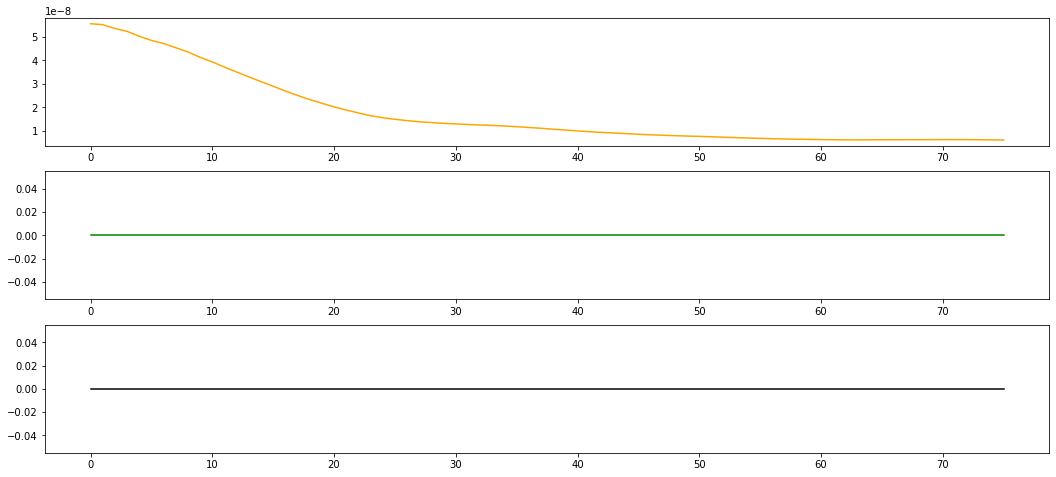

In [11]:
sirdMatrix = np.zeros((len(recov) - 1, 4, 4))
nextIterMatrix = np.zeros((len(recov) - 1, 4, 1)) #the S(t+1), I(t+1), ... matrix

#populate the 4x4 matrix with parameters (see above note)
sirdMatrix[:,0,0] = suscept[0:-1]
sirdMatrix[:,0,1] = -suscept[0:-1] * infect[0:-1]

sirdMatrix[:,1,0] = infect[0:-1]
sirdMatrix[:,1,1] = suscept[0:-1] * infect[0:-1]
sirdMatrix[:,1,2] = -infect[0:-1]
sirdMatrix[:,1,3] = -infect[0:-1]

sirdMatrix[:,2,0] = recov[0:-1]
sirdMatrix[:,2,2] = infect[0:-1]

sirdMatrix[:,3,0] = dead[0:-1]
sirdMatrix[:,3,3] = infect[0:-1]

#populate the S(t+1), I(t+1), ... matrix
nextIterMatrix[:,0,0] = suscept[1:]
nextIterMatrix[:,1,0] = infect[1:]
nextIterMatrix[:,2,0] = recov[1:]
nextIterMatrix[:,3,0] = dead[1:]

paramMatrix = np.linalg.solve(sirdMatrix, nextIterMatrix) #solve Ax = B, where A = sirdMatrix, and B = nextIterMatrix

#copy params over from the solved matrix
transRate = paramMatrix[:,1,0] #beta
recovRate = paramMatrix[:,2,0] #gamma
deathRate = paramMatrix[:,3,0] #upsilon

#plot rates over time
fig, ax = plt.subplots(3, 1, figsize=(18,8))
ax[0].plot(transRate, color='orange', label='Transmission Rate')
ax[1].plot(recovRate, color='green', label='Recovery Rate')
ax[2].plot(deathRate, color='black', label='Death Rate')

### An attempt at matching the results of the paper

The paper uses the first 120 days and plots the results.
The results below are very close (the recovery rate is slightly different, the paper seems to have used a lot more smoothing).

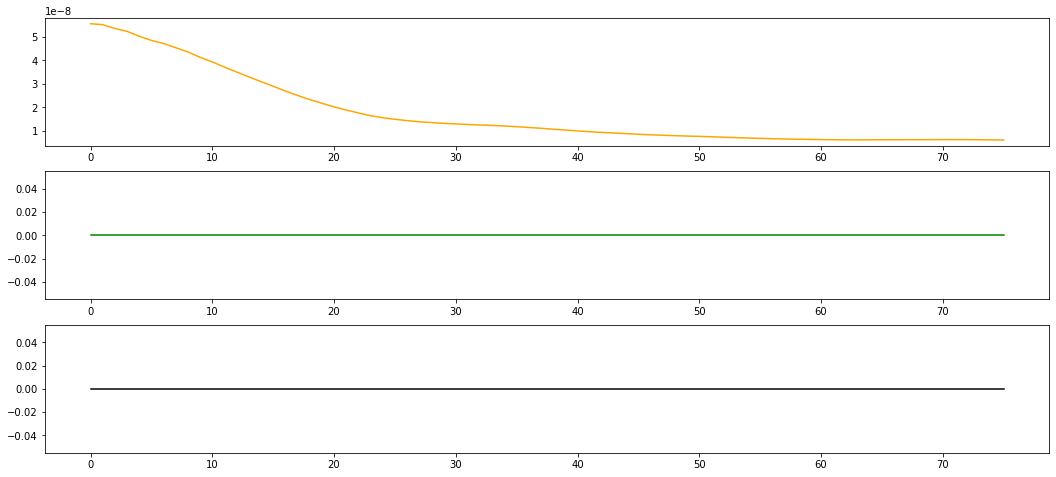

In [12]:
#graph only the first ~100-120 days (remember the first some days are removed when smoothing)
fig, ax = plt.subplots(3, 1, figsize=(18,8))
ax[0].plot(transRate[0:120], color='orange', label='Transmission Rate')
ax[1].plot(recovRate[0:120], color='green', label='Recovery Rate')
ax[2].plot(deathRate[0:120], color='black', label='Death Rate')

### National Data

97


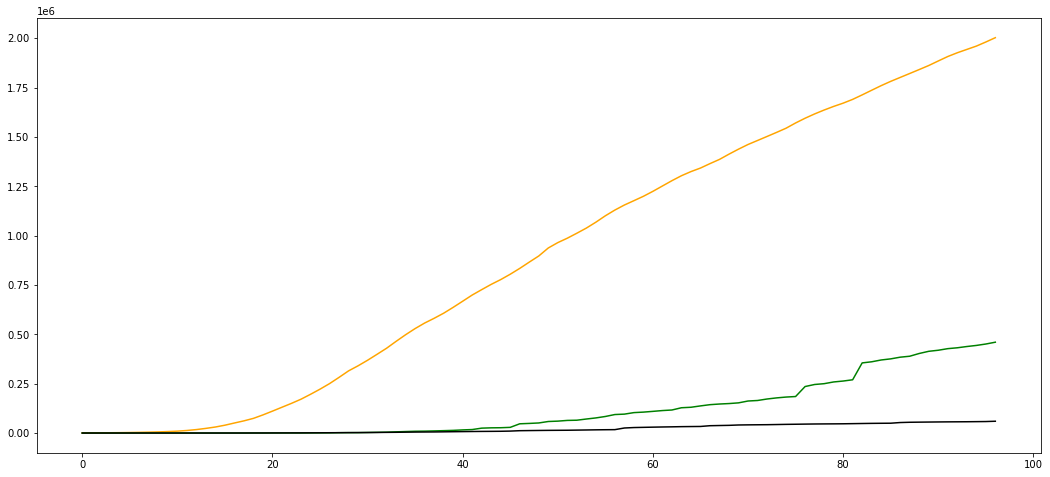

In [13]:
CountyD=database.CovidData
[N] = np.shape(CountyD[13].positive)
print(N)
natInfected = [0] * N
natRecovered = [0] * N
natDeaths = [0] * N
for key in CountyD:
    natInfected += CountyD[key].positive
    natRecovered += CountyD[key].healed
    natDeaths += CountyD[key].deaths
popITA = 60000000
susceptRaw = popITA - natInfected - natRecovered - natDeaths
fig, ax = plt.subplots(figsize=(18,8))
#ax.plot(suscept, color='blue', label='suscpetible') #graphing susceptible makes the scaling to hard to visualize
ax.plot(natInfected, color='orange', label='infected')
ax.plot(natRecovered, color='green', label='recovered')
ax.plot(natDeaths, color='black', label='dead')

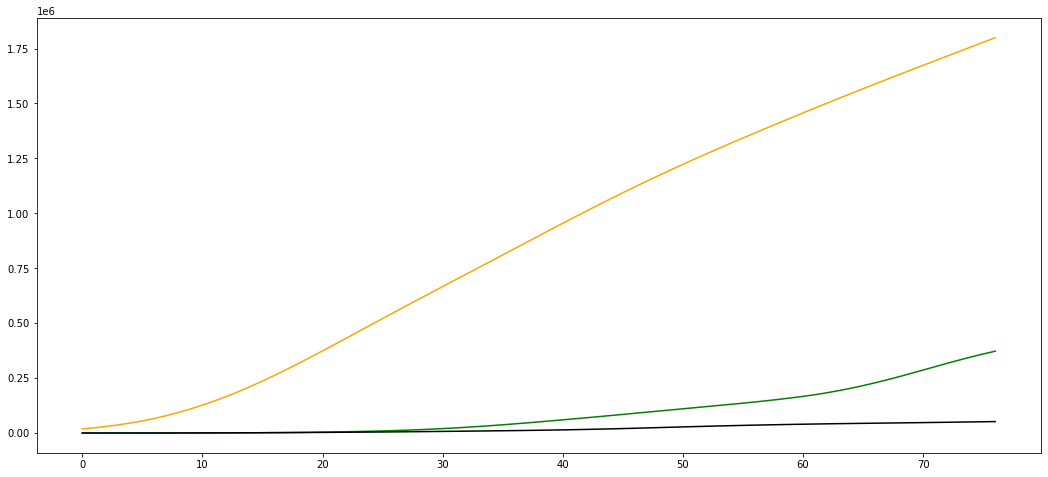

In [14]:
#convolve the data to smooth out, valid mode keeps bound points realistic
sigma = 5
conSize = 10
x2 = np.arange(-conSize, 1 + conSize)
kernel2 = np.exp(-(x2) ** 2 / (2 * sigma ** 2))
kernel2=kernel2/sum(kernel2)
infect = np.convolve(natInfected, kernel2, 'valid')
recov = np.convolve(natRecovered, kernel2, 'valid')
dead = np.convolve(natDeaths, kernel2, 'valid')
suscept = popITA - infect - recov - dead #S + I + R + D = totalPop

fig, ax = plt.subplots(figsize=(18,8))
#ax.plot(suscept, color='blue', label='suscpetible') #graphing susceptible makes the scaling to hard to visualize
ax.plot(infect, color='orange', label='infected')
ax.plot(recov, color='green', label='recovered')
ax.plot(dead, color='black', label='dead')

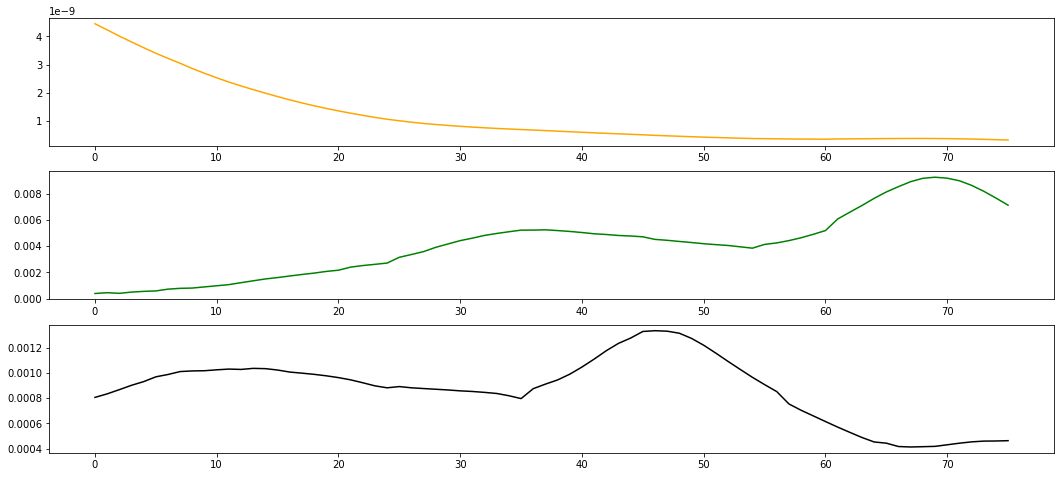

In [15]:
sirdMatrix = np.zeros((len(recov) - 1, 4, 4))
nextIterMatrix = np.zeros((len(recov) - 1, 4, 1)) #the S(t+1), I(t+1), ... matrix

#populate the 4x4 matrix with parameters (see above note)
sirdMatrix[:,0,0] = suscept[0:-1]
sirdMatrix[:,0,1] = -suscept[0:-1] * infect[0:-1]

sirdMatrix[:,1,0] = infect[0:-1]
sirdMatrix[:,1,1] = suscept[0:-1] * infect[0:-1]
sirdMatrix[:,1,2] = -infect[0:-1]
sirdMatrix[:,1,3] = -infect[0:-1]

sirdMatrix[:,2,0] = recov[0:-1]
sirdMatrix[:,2,2] = infect[0:-1]

sirdMatrix[:,3,0] = dead[0:-1]
sirdMatrix[:,3,3] = infect[0:-1]

#populate the S(t+1), I(t+1), ... matrix
nextIterMatrix[:,0,0] = suscept[1:]
nextIterMatrix[:,1,0] = infect[1:]
nextIterMatrix[:,2,0] = recov[1:]
nextIterMatrix[:,3,0] = dead[1:]

paramMatrix = np.linalg.solve(sirdMatrix, nextIterMatrix) #solve Ax = B, where A = sirdMatrix, and B = nextIterMatrix

#copy params over from the solved matrix
transRate = paramMatrix[:,1,0] #beta
recovRate = paramMatrix[:,2,0] #gamma
deathRate = paramMatrix[:,3,0] #upsilon

#plot rates over time
fig, ax = plt.subplots(3, 1, figsize=(18,8))
ax[0].plot(transRate, color='orange', label='Transmission Rate')
ax[1].plot(recovRate, color='green', label='Recovery Rate')
ax[2].plot(deathRate, color='black', label='Death Rate')